In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import numpy as np
import os
import matplotlib.pyplot as plt
import keras
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam



In [3]:
path='/content/drive/My Drive/Glaucoma'
mainDIR= os.listdir(path)
print(mainDIR)

['train', 'test']


In [4]:
test_path='/content/drive/My Drive/Glaucoma/test'
train_path='/content/drive/My Drive/Glaucoma/train'

In [5]:
from keras_preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(rescale=1./255,shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
                                

test_datagen=ImageDataGenerator(rescale=1./255)

training_set=train_datagen.flow_from_directory('/content/drive/My Drive/Glaucoma/train',target_size = (224,224),
                                                 batch_size = 3,
                                                 class_mode = 'binary')

testing_set=test_datagen.flow_from_directory('/content/drive/My Drive/Glaucoma/test',target_size = (224,224),
                                                 batch_size = 3,
                                                 class_mode = 'binary')

Found 68 images belonging to 2 classes.
Found 12 images belonging to 2 classes.


In [6]:
training_set.class_indices

{'Glaucoma': 0, 'Non Glaucoma': 1}

In [56]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation = 'relu', input_shape = (224, 224, 3)), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(16, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [58]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy']  ) 

In [59]:
history=model_fit=model.fit(training_set,epochs=20)

Epoch 1/20
23/23 [==============================] - 2s 61ms/step - loss: 0.6691 - accuracy: 0.5870
Epoch 2/20
23/23 [==============================] - 1s 60ms/step - loss: 0.3249 - accuracy: 0.9110
Epoch 3/20
23/23 [==============================] - 1s 62ms/step - loss: 0.1375 - accuracy: 0.9200
Epoch 4/20
23/23 [==============================] - 1s 61ms/step - loss: 0.2067 - accuracy: 0.9228
Epoch 5/20
23/23 [==============================] - 1s 63ms/step - loss: 0.1183 - accuracy: 0.9535
Epoch 6/20
23/23 [==============================] - 1s 60ms/step - loss: 0.0254 - accuracy: 1.0000
Epoch 7/20
23/23 [==============================] - 1s 62ms/step - loss: 0.0110 - accuracy: 1.0000
Epoch 8/20
23/23 [==============================] - 1s 59ms/step - loss: 0.0084 - accuracy: 1.0000
Epoch 9/20
23/23 [==============================] - 1s 62ms/step - loss: 0.0021 - accuracy: 1.0000
Epoch 10/20
23/23 [==============================] - 1s 61ms/step - loss: 0.0041 - accuracy: 1.0000
Epoch 11/

In [24]:
predictions=model.predict(testing_set)

In [25]:
predictions

array([[9.9998772e-01],
       [1.7174210e-01],
       [2.1145428e-05],
       [1.6770131e-05],
       [9.9999499e-01],
       [9.9999952e-01],
       [7.1929744e-06],
       [9.9999893e-01],
       [3.2444859e-03],
       [9.9999940e-01],
       [2.6728320e-03],
       [9.9999392e-01]], dtype=float32)

In [28]:
import numpy as np
y_pred = np.argmax(predictions, axis=1)
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0]


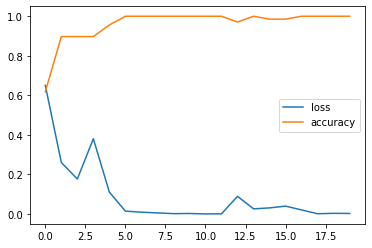

In [68]:
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['accuracy'],label='accuracy')
# plt.plot(history.history['mean_absolute_error'],label='mean')
plt.legend();
         

In [67]:
model.evaluate_generator(testing_set)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[0.002768420847132802, 1.0]

In [31]:
from google.colab import files
uploaded = files.upload()

Saving 1 (39).tif to 1 (39).tif


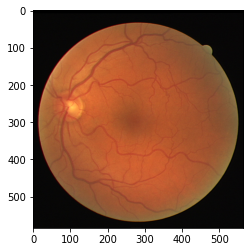

In [32]:
new_image = plt.imread('1 (39).tif')
img=plt.imshow(new_image)


In [34]:
from PIL import Image

im = Image.open('1 (39).tif')
width, height = im.size
print(width, height)

565 584


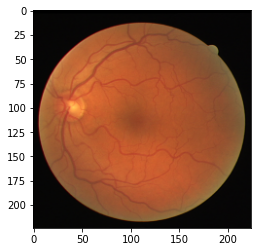

In [35]:
from skimage.transform import resize

resized_img=resize(new_image,(224,224,3))

img=plt.imshow(resized_img)


In [38]:
prediction= model.predict(np.array([resized_img]))
prediction

array([[0.9999974]], dtype=float32)

In [70]:
from tensorflow.keras.models import load_model

In [71]:
model.save('model_img.h5')